## Final Project Submission

Please fill out:
* Student name: Eva Moisasi
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Multiple Linear Regression on King County Housing 

# Business Problem
In this project, we are analyzing the data to answer a critical question in the world of real estate. What factors should a housing development company consider while building a property so that it may sell for its highest price?

In [569]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [570]:
#Load the data
data=pd.read_csv('data/kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [571]:
print("The number of rows is",data.shape[0])
print('The number of columns is',data.shape[1])

The number of rows is 21597
The number of columns is 21


In [572]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [573]:
#check for duplicates
data.duplicated(keep = False).sum()

0

# Drop the "id" and "date" columns since we don't need them.

In [574]:
data.drop(["id", "date"],axis=1, inplace = True)

In [575]:
#confirm that the two columns have been droped
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


# Fill null values for "waterfront".

In [576]:
#check for null values
data.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [577]:
print(data.waterfront.isnull().sum())
print(data['waterfront'].value_counts())


2376
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [578]:
print('Mean = ',data['waterfront'].mean())
print('Median = ',data['waterfront'].median())

Mean =  0.007595858696217679
Median =  0.0


In [579]:
# Replace all the missing values in the waterfront column with the Median
data['waterfront'].fillna(data['waterfront'].median(), inplace=True)
data['waterfront'].isnull().sum()

0

# Fill null values for "view" 

In [580]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [581]:
data['view'].mean()

0.23386272870808952

In [582]:
data['view'].median()

0.0

In [583]:
data['view'].fillna(data['view'].median(),inplace=True)

In [584]:
data.view.isnull().sum()

0

# Creat a new column to replace the yr_renovated where 1= Renovated and 0=Not renoveted

In [585]:
data.yr_renovated.mean()
        

83.6367783722895

In [586]:
data.yr_renovated.median()

0.0

In [587]:
data.yr_renovated.fillna(data.yr_renovated.median(),inplace=True)
data.yr_renovated.isnull().sum()

0

In [588]:
data['renovated'] = np.where(data['yr_renovated'] == 0, 0, 1)


In [589]:
#drop the "yr_rnovated" colum
data.drop('yr_renovated',axis=1, inplace = True)

In [590]:
data.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

# clean "Sqft_Basement" column by replacing '?' with 0 and converting the data type from object ot float

In [591]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2310.0        1
415.0         1
2580.0        1
1880.0        1
935.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [592]:
#replace the '?' in the besement column with 0
data['sqft_basement'] = data['sqft_basement'].replace(to_replace='?', value='0.0')

In [593]:
data.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2310.0        1
415.0         1
2580.0        1
1880.0        1
935.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [594]:
#convert the data type of 'sqft_basement' from object to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [595]:
#confirm we don't have any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  renova

In [596]:
#check the data statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.034449
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,0.182384
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


<AxesSubplot:>

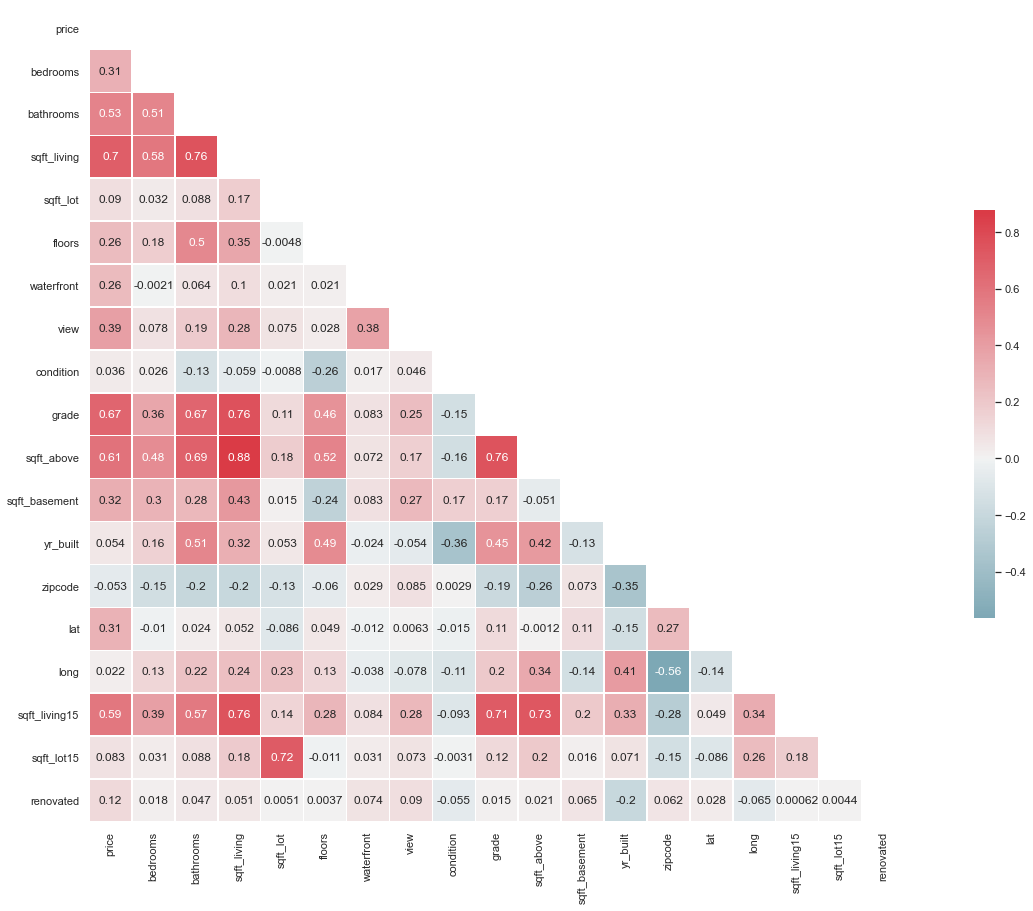

In [597]:
#create a heatmap

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


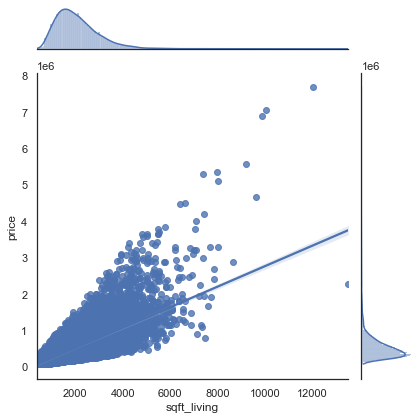

In [598]:
# examining the relationship between sqft_living and price
sns.jointplot('sqft_living',"price", data=data, kind='reg')
ax.set_title('Square footliving vs. Price', fontsize=50)
plt.tight_layout()



The visualization above shows that there seems to be a relatively strong linear relationship between square feet of living space and the price of a house.

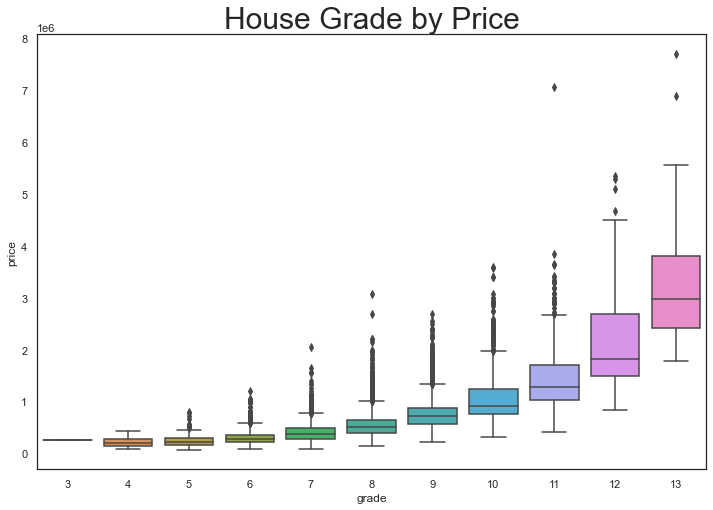

In [599]:
# examining the relationship between grade and price
plt.figure(figsize=(12,8))
sns.boxplot(x = 'grade', y = 'price', data = data)
plt.title('House Grade by Price',fontsize=30)
plt.show()

The visualization above shows that when the  building grade improves, the house price rise as well. We can see in the boxplot above that the mean house price for a home with a grade of 13 is far above other grades. While the building grade of 3 falls short of minimum building standards based on King County grading system.

# Feature Selection: Grade, Sqft_Living, Sqft_Living15
Create scatter plot to check for linearity

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='grade', ylabel='price'>

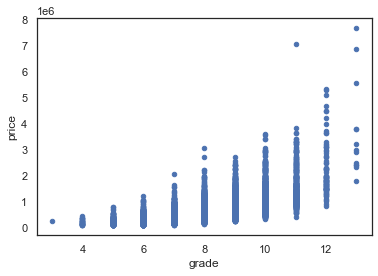

In [600]:
data.plot("grade","price", kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


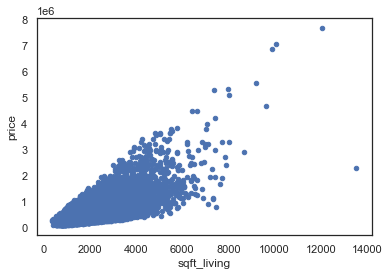

In [601]:
data.plot("sqft_living","price", kind='scatter')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


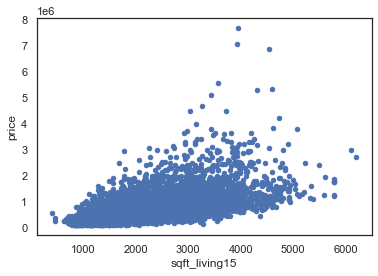

In [602]:
data.plot('sqft_living15',"price", kind='scatter')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


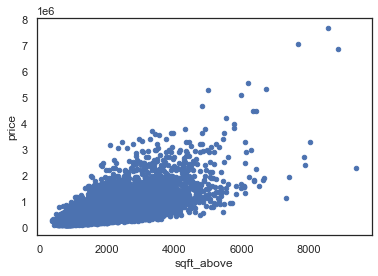

In [603]:
data.plot('sqft_above',"price", kind='scatter')
plt.show()

# Create a Model

In [604]:
#create a model with the selected features
from statsmodels.formula.api import ols
f = 'price~grade+sqft_living+sqft_living15+sqft_above'
model = ols(formula=f, data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6392.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:00:36   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.524e+05   1.36e+04    -47.992      0.000   -6.79e+05   -6.26e+05
grade          1.065e+05   2420.294     43.989      0.000    1.02e+05    1.11e+05
sqft_living     227.4630      4.188     54.316      0.000     219.255     235.671
sqft_living15    25.6797      4.029      6.374      0.000      17.783      33.576
sqft_above      -82.0946      4.467    -18.378      0.000     -90.850     -73.339
==============================================================================
Omnibus:                    17311.756   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1135308.372
Skew:                           3.379   Prob(JB):                         0.00
Kurtosis:                      37.871   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the r2 score, only 54.2% of our results can be explained from the data. This is low, Another model will have to be run, potentially with more/transformed variables in order to get a more trustworthy result.

# Model 2
Let's first Standardize the variables

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


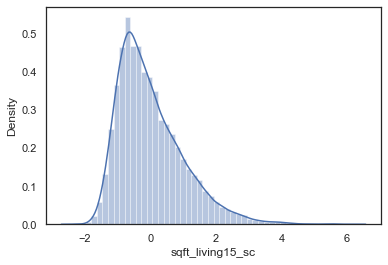

In [605]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_data = data['sqft_living15'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
data['sqft_living15_sc'] = scale_data.flatten()

x = data['sqft_living15_sc']
ax = sns.distplot(x)


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


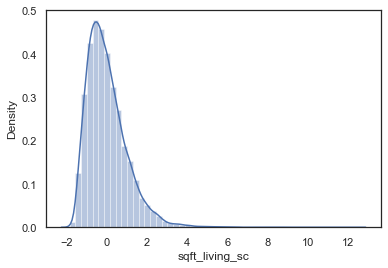

In [606]:
scaler = StandardScaler()
col_data =data['sqft_living'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
data['sqft_living_sc'] = scale_data.flatten()

x = data['sqft_living_sc']
ax = sns.distplot(x)


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


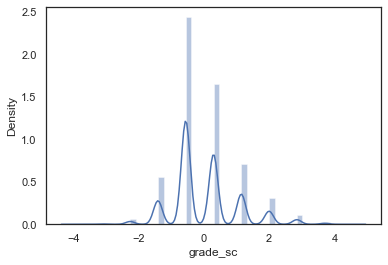

In [607]:
scaler = StandardScaler()
col_data = data['grade'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
data['grade_sc'] = scale_data.flatten()

x = data['grade_sc']
ax = sns.distplot(x)


In [608]:
f = 'price~grade_sc+sqft_living_sc+sqft_living15_sc'
model = ols(formula=f, data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8282.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:00:37   Log-Likelihood:            -2.9912e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.403e+05   1704.734    316.939      0.000    5.37e+05    5.44e+05
grade_sc           1.13e+05   2786.181     40.561      0.000    1.08e+05    1.18e+05
sqft_living_sc    1.637e+05   2982.858     54.892      0.000    1.58e+05     1.7e+05
sqft_living15_sc  1.047e+04   2754.454      3.802      0.000    5072.131    1.59e+04
==============================================================================
Omnibus:                    17073.030   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043757.328
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.400   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that after standardization of our selected features our model performed poorly than before.

In [609]:
#include the zipcode column to the model
#zipcodes have no numerical significance in our data,this variable is treated as categorica
f = 'price~grade_sc+sqft_living_sc+sqft_living15_sc+C(zipcode)'
model = ols(formula=f, data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     880.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:00:38   Log-Likelihood:            -2.9257e+05
No. Observations:               21597   AIC:                         5.853e+05
Df Residuals:                   21524   BIC:                         5.859e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.401e+05   9763.503     34.832      0.000    3.21e+05    3.59e+05
C(zipcode)[T.98002]  5.154e+04   1.64e+04      3.146      0.002    1.94e+04    8.37e+04
C(zipcode)[T.98003] -7290.2073   1.48e+04     -0.494      0.621   -3.62e+04    2.16e+04
C(zipcode)[T.98004]  7.791e+05   1.44e+04     54.098      0.000    7.51e+05    8.07e+05
C(zipcode)[T.98005]  2.946e+05   1.74e+04     16.938      0.000    2.61e+05    3.29e+05
C(zipcode)[T.98006]  2.759e+05    1.3e+04     21.214      0.000     2.5e+05    3.01e+05
C(zipcode)[T.98007]  2.358e+05   1.84e+04     12.800      0.000       2e+05    2.72e+05
C(zipcode)[T.98008]  2.946e+05   1.47e+04     20.017      0.000    2.66e+05    3.23e+05
C(zipcode)[T.98010]  8.655e+04   2.09e+04      4.132      0.000    4.55e+04    1.28e+05
C(zipcode)[T.98011]  1.015e+05   1.65e+04      6.156      0.000    6.92e+04    1.34e+05
C(zipcode)[T.98014]   1.26e+05   1.93e+04      6.534      0.000    8.82e+04    1.64e+05
C(zipcode)[T.98019]  7.148e+04   1.66e+04      4.301      0.000    3.89e+04    1.04e+05
C(zipcode)[T.98022]  5.562e+04   1.56e+04      3.572      0.000    2.51e+04    8.61e+04
C(zipcode)[T.98023] -3.116e+04   1.28e+04     -2.433      0.015   -5.63e+04   -6051.956
C(zipcode)[T.98024]  1.907e+05   2.29e+04      8.322      0.000    1.46e+05    2.36e+05
C(zipcode)[T.98027]  1.519e+05   1.34e+04     11.319      0.000    1.26e+05    1.78e+05
C(zipcode)[T.98028]   1.13e+05   1.47e+04      7.675      0.000    8.41e+04    1.42e+05
C(zipcode)[T.98029]  1.848e+05   1.43e+04     12.931      0.000    1.57e+05    2.13e+05
C(zipcode)[T.98030] -5948.5415   1.51e+04     -0.393      0.694   -3.56e+04    2.37e+04
C(zipcode)[T.98031]  6706.5516   1.49e+04      0.451      0.652   -2.24e+04    3.58e+04
C(zipcode)[T.98032]  1.554e+04   1.92e+04      0.808      0.419   -2.22e+04    5.32e+04
C(zipcode)[T.98033]  3.763e+05   1.33e+04     28.397      0.000     3.5e+05    4.02e+05
C(zipcode)[T.98034]  2.117e+05   1.26e+04     16.833      0.000    1.87e+05    2.36e+05
C(zipcode)[T.98038]  1.256e+04   1.24e+04      1.013      0.311   -1.18e+04    3.69e+04
C(zipcode)[T.98039]  1.353e+06   2.81e+04     48.070      0.000     1.3e+06    1.41e+06
C(zipcode)[T.98040]  5.569e+05   1.49e+04     37.287      0.000    5.28e+05    5.86e+05
C(zipcode)[T.98042]  3900.2606   1.26e+04      0.310      0.756   -2.07e+04    2.85e+04
C(zipcode)[T.98045]  1.059e+05   1.59e+04      6.681      0.000    7.48e+04    1.37e+05
C(zipcode)[T.98052]  2.094e+05   1.25e+04     16.732      0.000    1.85e+05    2.34e+05
C(zipcode)[T.98053]  1.837e+05   1.35e+04     13.600      0.000    1.57e+05     2.1e+05
C(zipcode)[T.98055]  5.598e+04   1.49e+04      3.746      0.000    2.67e+04    8.53e+04
C(zipcode)[T.98056]  1.126e+05   1.34e+04      8.396      0.000    8.63e+04    1.39e+05
C(z

# Validate Model using theTrain-Test- Split

In [610]:
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [611]:
df_train = pd.DataFrame(X_train, columns = X.columns)
df_train['price'] = y_train
df_test = pd.DataFrame(X_test, columns = X.columns)
df_test['price'] = y_test


In [612]:
from sklearn.metrics import r2_score
y_hat_test = model.predict(df_test)
r2_score(y_test, y_hat_test)


0.7324798441625024

# Conclusion & Recommendations

The results of the analysis were as follows:
After running the second model with an  R-squared value of 0.733, telling us that the model fit the data with an accuracy of 73%, We can confidently say that zipcode is one of the strongest influencers on the value of homes in king county.
other features that were positively correlated with price included:
Square-footage of living space, which was positively correlated with house prices.
Building grade, which was positively correlated with house prices
The square footage of interior housing living space for the nearest 15 neighbors which was positively correlated with house price.

The recommendations below will enable a housing development company in King County to increase their chances of selling higher-priced homes:

1.)Make sure your home is in an upscale zipcodes

2.)Increase square-footage of living space

3.)Attain highest possible building grade by using high-quality materials so that it is graded well by the King County Grading System

4.)Choose land/lots where the nearest 15 neighbors have a large amount of interior square footage.

# Future Work


In the future, the next steps would be reducing noise in the data to improve the accuracy of our model. Additionally, i would like to investigate certain features like proximity to good schools, other facilities like hospital, gyms, restaurants and play grounds.
